## **NAME: UMANG KIRIT LODAYA**
## **SAP ID: 60009200032**
## **BATCH/DIV: K - K1**

## **IMPLEMENTING TSP USING GENETIC ALGORITHM**

**IMPORTING LIBRARIES**

In [1]:
import random
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**CREATING NEW ROUTE IN POPULATION**

In [2]:
def create_new_route(n):
    population = set(np.arange(n, dtype=int))
    # print(pop)
    route = list(random.sample(population, n))
    # print(route)

    return route

**CREATING THE STARTING POPULATION**

In [3]:
def create_starting_population(num_of_routes,num_of_city):
    population = []
    
    for i in range(0, num_of_routes):
        population.append(create_new_route(num_of_city))
        # print(population[i])

    return population

**PICKING THE RANDOM CITY FROM N CITIES**

In [4]:
def pick_mate(n):
    return random.randint(0,n)

**GETTING THE EUCLIDEAN DISTANCE BETWEEN CITY A AND CITY B**

In [5]:
def distance(A,B):

    # A, B = (x, y) -> COORDINATES
    return np.sqrt((A[0]-B[0])**2 + (A[1]-B[1])**2)

**CALCULATING THE FITNESS VALUE OF SINGLE ROUTE**

In [6]:
def fitness(route, CityList):
    # CityList = ORIGINAL LIST OF CITIES WITH ITS COORDINATES

    score = 0
    for i in range(1,len(route)):
        a = int(route[i-1])
        b = int(route[i])

        score = score + distance(CityList[a],CityList[b])    
        
    return score

**PERFORMING THE CYCLIC CROSSOVER**

In [7]:
def crossover(P1, P2):
    indices = [None for i in range(len(P1))]
    value = 1
    while (None in indices):
        inx = indices.index(None)
        start = P1[inx]
        indices[inx] = value
        while(P2[inx]!=start):
            inx = P1.index(P2[inx])
            indices[inx] = value
        value += 1
    # print(indices)
    
    C1 = []
    C2 = []
    value = 0
    for i in indices:
        if (i%2==1):
            C1.append(P1[value])
            C2.append(P2[value])
        else:
            C1.append(P2[value])
            C2.append(P1[value])
        value += 1
        
    # print(C1)
    # print(C2)
    return C1

**RANKING THE ROUTES IN POPULATION ACC TO FITNESS SCORE**

In [8]:
def rankRoutes(population, City_List):
    fitnessResults = {}

    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i], City_List)

    # print(fitnessResults)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

**SELECTING THE TOP POPULATION**

In [9]:
def selection(popRanked, limit):
    selectionResults=[]
    result=[]

    for route in popRanked:
        result.append(route[0])

    for i in range(limit):
        selectionResults.append(result[i])
    
    return selectionResults

**SELECTING MAPPED ROUTES FROM POPULATION WHICH WERE AT THE TOP**

In [10]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):

        index = selectionResults[i]
        matingpool.append(population[index])

    return matingpool

**GENERATING NEW POPULATION BY BREEDING**

In [11]:
def breedPopulation(mating_pool):
    children = []
    for i in range(len(mating_pool) - 1):
            children.append(crossover(mating_pool[i], mating_pool[i+1]))

    return children

**PERFORMING THE MUTATION ON SINGLE ROUTE CONSIDERING ITS PROBABILITY**

In [12]:
def mutate(route, probablity):
    route = np.array(route)
    for to_ in range(len(route)):
        if(random.random() < probablity):
            from_ = np.random.randint(0, len(route))
            
            temp1 = route[to_]
            temp2 = route[from_]

            route[from_] = temp1
            route[to_] = temp2
    
    return route

**PERFORMING MUTATION ON THE POPULATION**

In [13]:
def mutatePopulation(children, mutation_rate):
    new_generation=[]

    for route in children:
        muated_child=mutate(route, mutation_rate)
        new_generation.append(muated_child)
    
    return new_generation

**GETTING THE NEXT GENERATION**

In [14]:
def next_generation(City_List, current_population, mutation_rate,limit):
    
    population_rank = rankRoutes(current_population, City_List)
    #print(f"population rank : {population_rank}")
    
    selection_result = selection(population_rank, limit)
    #print(f"selection results {selection_result}")
    
    mating_pool = matingPool(current_population, selection_result)
    #print(f"mating pool {mating_pool}")
    
    children = breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation = mutatePopulation(children, mutation_rate)
    #print(f"next_generation {next_generation}")

    return next_generation

**IMPLEMENTATION OF GENETIC ALGORITHM**

In [15]:
def GA(City_List):
    size = 2000
    limit = 100
    rate = 0.01
    generation = 2000
    
    pop=[]
    progress = []
    
    Number_of_cities=len(City_List)
    
    population = create_starting_population(size, Number_of_cities)

    # GET THE FITNESS SCORE OF ROUTE WITH LOWEST SCORE
    progress.append(rankRoutes(population, City_List)[0][1])

    print(f"\nINITIAL ROUTE =  {population[0]}")
    print(f"INITIAL ROUTE DISTANCE =  {progress[0]}")

    for i in range(0, generation):
        pop = next_generation(City_List, population, rate, limit)
        progress.append(rankRoutes(pop, City_List)[0][1])
    
    rank_ = rankRoutes(pop, City_List)[0]
    
    print(f"\n\nBEST ROUTE = {list(pop[rank_[0]])} ")
    print(f"BEST ROUTE DISTANCE {rank_[1]}\n\n")

    plt.figure(figsize=(15,8))
    plt.plot(progress)
    plt.xlabel('NUMBER OF GENERATION')
    plt.ylabel('DISTANCE')
    plt.show()

### **GA ON 20 CITIES**


INITIAL ROUTE =  [2, 12, 11, 14, 6, 3, 19, 7, 8, 16, 15, 4, 17, 10, 13, 0, 9, 5, 1, 18]
INITIAL ROUTE DISTANCE =  1367.7537752036721


BEST ROUTE = [6, 17, 15, 19, 13, 4, 8, 5, 1, 3, 0, 7, 18, 14, 9, 16, 2, 12, 10, 11] 
BEST ROUTE DISTANCE 1236.7360584536555




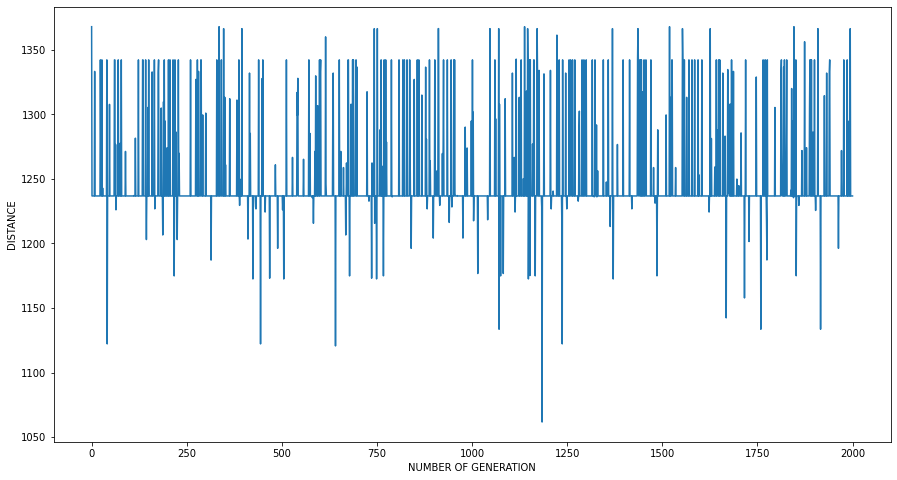

In [16]:
num_of_cities = 20

cityList = []
for i in range(0,num_of_cities):
    x = int(random.random() * 200)
    y = int(random.random() * 200)
    cityList.append((x,y))

GA(cityList)

**AS WE CAN SEE, AT AROUND GENERATION 1200, WE GET THE LOWEST DISTANCE FOR TSP WHICH IS AROUND 1175**

## **GA ON 5, 10, 20, 40 CITIES**


FOR NUMBER OF CITIES = 5

INITIAL ROUTE =  [0, 4, 3, 1, 2]
INITIAL ROUTE DISTANCE =  259.0940061642148


BEST ROUTE = [1, 4, 2, 3, 0] 
BEST ROUTE DISTANCE 259.0940061642148




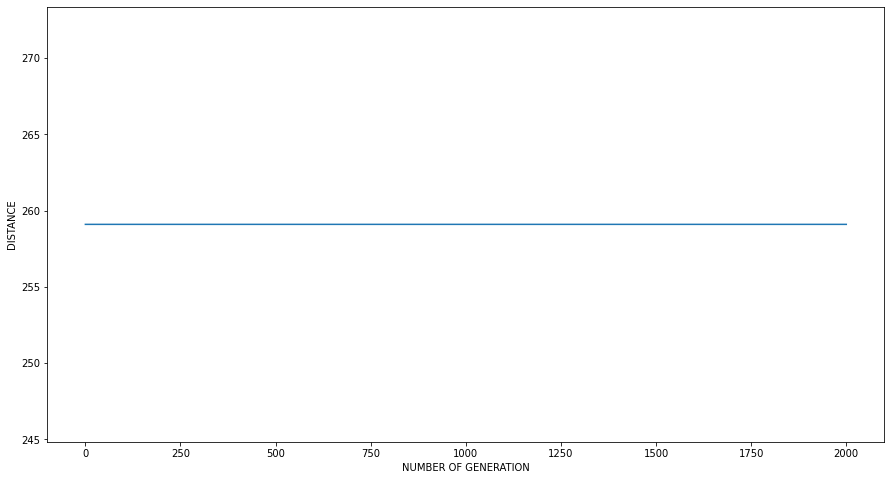



----------------------------------


FOR NUMBER OF CITIES = 10

INITIAL ROUTE =  [4, 2, 7, 0, 3, 8, 6, 1, 5, 9]
INITIAL ROUTE DISTANCE =  610.0475985058044


BEST ROUTE = [8, 3, 4, 1, 5, 0, 2, 6, 7, 9] 
BEST ROUTE DISTANCE 609.7228676810886




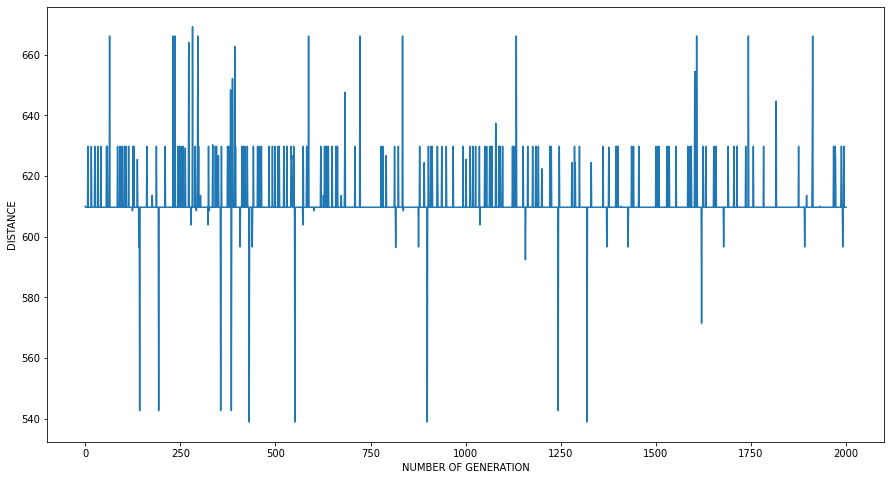



----------------------------------


FOR NUMBER OF CITIES = 20

INITIAL ROUTE =  [19, 14, 13, 17, 15, 5, 9, 12, 3, 11, 0, 18, 7, 10, 2, 16, 6, 1, 4, 8]
INITIAL ROUTE DISTANCE =  1286.4603734252366


BEST ROUTE = [0, 19, 13, 17, 14, 3, 6, 10, 4, 12, 9, 16, 5, 15, 18, 1, 2, 7, 8, 11] 
BEST ROUTE DISTANCE 1343.5089455681243




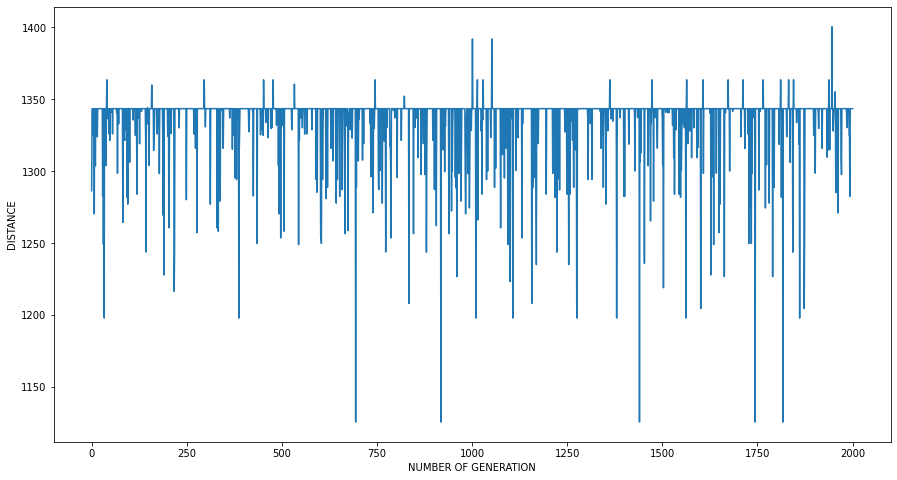



----------------------------------


FOR NUMBER OF CITIES = 40

INITIAL ROUTE =  [14, 8, 0, 11, 12, 16, 30, 37, 29, 23, 10, 2, 36, 27, 24, 33, 3, 18, 39, 4, 13, 38, 9, 17, 35, 25, 15, 19, 5, 1, 22, 34, 6, 7, 20, 32, 26, 31, 21, 28]
INITIAL ROUTE DISTANCE =  3114.541570437688


BEST ROUTE = [38, 25, 16, 1, 32, 36, 30, 19, 10, 2, 34, 8, 3, 21, 5, 9, 28, 15, 31, 18, 24, 35, 26, 6, 11, 33, 14, 37, 0, 23, 12, 4, 17, 22, 13, 20, 39, 29, 7, 27] 
BEST ROUTE DISTANCE 3053.7872804879153




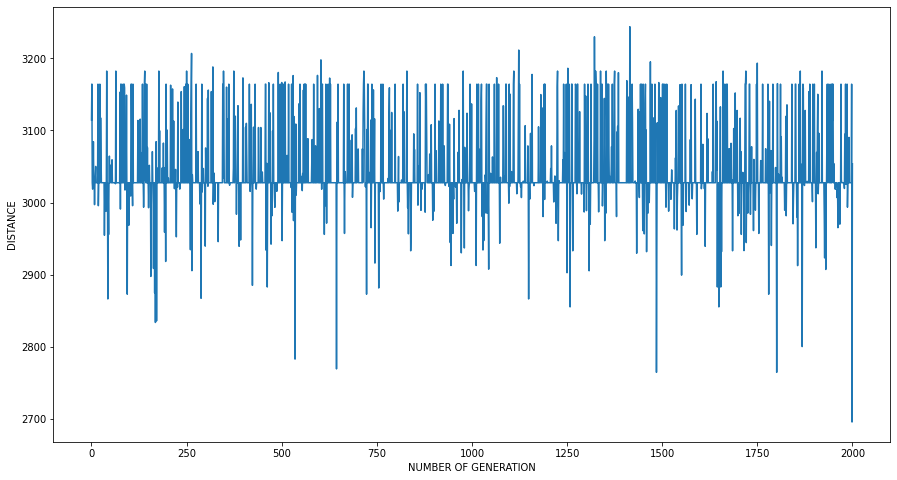



----------------------------------



In [17]:
num_of_cities = [5, 10, 20, 40]

for i in num_of_cities:
    print(f'\nFOR NUMBER OF CITIES = {i}')

    cityList = []
    for i in range(0, i):
        x = int(random.random() * 200)
        y = int(random.random() * 200)
        cityList.append((x,y))

    GA(cityList)
    print("\n\n----------------------------------\n")

**CONCLUSION:**

*   **FOR CITIES = 5 : BEST ROUTE IS FOUND AT START WITH DISTANCE = 260**
*   **FOR CITIES = 10 : BEST ROUTE IS FOUND AT 400TH GENERATION WITH DISTANCE = 540**
*   **FOR CITIES = 20 : BEST ROUTE IS FOUND AT 700TH GENERATION WITH DISTANCE = 1000**
*   **FOR CITIES = 40 : BEST ROUTE IS FOUND AT 2000TH GENERATION WITH DISTANCE = 2700**
